In [1]:
#import dependencies
import pandas as pd
import matplotlib as plt
import numpy as np
import time
from datetime import datetime

In [2]:
#create random coordinates 

lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

567

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key 

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | powell river
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | atar
Processing Record 7 of Set 1 | trois-rivieres
Processing Record 8 of Set 1 | golden
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | la primavera
Processing Record 11 of Set 1 | mopti
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | sydney
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | montorio al vomano
Processing Record 17 of Set 1 | chapada dos guimaraes
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | ukiah
Processing Record 22 of Set 1 | mar

Processing Record 37 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 38 of Set 4 | teguise
Processing Record 39 of Set 4 | fort nelson
Processing Record 40 of Set 4 | solnechnyy
Processing Record 41 of Set 4 | sinnamary
Processing Record 42 of Set 4 | lakeland highlands
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | staroaleyskoye
Processing Record 45 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 46 of Set 4 | olafsvik
Processing Record 47 of Set 4 | oussouye
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | soure
Processing Record 50 of Set 4 | paamiut
Processing Record 1 of Set 5 | kenai
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | kamakwie
Processing Record 4 of Set 5 | flin flon
Processing Record 5 of Set 5 | balikpapan
Processing Record 6 of Set 5 | ayorou
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | guerrero negro
Processing Record 9 of

Processing Record 27 of Set 8 | el tigre
Processing Record 28 of Set 8 | ishigaki
Processing Record 29 of Set 8 | yungkang
City not found. Skipping...
Processing Record 30 of Set 8 | rangapara
Processing Record 31 of Set 8 | porto walter
Processing Record 32 of Set 8 | tuy hoa
Processing Record 33 of Set 8 | sukhobezvodnoye
Processing Record 34 of Set 8 | malvern
Processing Record 35 of Set 8 | botngard
Processing Record 36 of Set 8 | den helder
Processing Record 37 of Set 8 | esperance
Processing Record 38 of Set 8 | kirakira
Processing Record 39 of Set 8 | boueni
Processing Record 40 of Set 8 | samarai
Processing Record 41 of Set 8 | hamilton
Processing Record 42 of Set 8 | greensboro
Processing Record 43 of Set 8 | hami
Processing Record 44 of Set 8 | rong kwang
Processing Record 45 of Set 8 | aswan
Processing Record 46 of Set 8 | sosenskiy
Processing Record 47 of Set 8 | chara
Processing Record 48 of Set 8 | hovd
Processing Record 49 of Set 8 | berlevag
Processing Record 50 of Set 

Processing Record 17 of Set 12 | nyurba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Powell River,49.8496,-124.5361,48.47,82,100,2.01,CA,2022-03-26 03:14:54
1,Albany,42.6001,-73.9662,45.36,80,100,4.00,US,2022-03-26 03:14:54
2,Cape Town,-33.9258,18.4232,61.27,70,92,8.28,ZA,2022-03-26 03:12:32
3,Longyearbyen,78.2186,15.6401,1.24,71,20,5.75,SJ,2022-03-26 03:13:16
4,Atar,20.5169,-13.0499,67.19,28,61,7.27,MR,2022-03-26 03:14:55
5,Trois-Rivieres,46.3501,-72.5491,33.48,97,100,0.00,CA,2022-03-26 03:10:43
6,Golden,39.7555,-105.2211,53.78,45,40,5.99,US,2022-03-26 03:12:47
7,Ushuaia,-54.8000,-68.3000,53.26,66,75,10.36,AR,2022-03-26 03:11:29
8,La Primavera,5.4906,-70.4092,84.33,56,99,1.41,CO,2022-03-26 03:14:56
9,Mopti,14.6667,-4.0000,85.14,44,45,11.39,ML,2022-03-26 03:14:57


In [31]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Powell River,CA,2022-03-26 03:14:54,49.8496,-124.5361,48.47,82,100,2.01
1,Albany,US,2022-03-26 03:14:54,42.6001,-73.9662,45.36,80,100,4.00
2,Cape Town,ZA,2022-03-26 03:12:32,-33.9258,18.4232,61.27,70,92,8.28
3,Longyearbyen,SJ,2022-03-26 03:13:16,78.2186,15.6401,1.24,71,20,5.75
4,Atar,MR,2022-03-26 03:14:55,20.5169,-13.0499,67.19,28,61,7.27
...,...,...,...,...,...,...,...,...,...
517,Killam,CA,2022-03-26 03:29:44,52.7834,-111.8518,30.15,74,95,14.97
518,Flinders,AU,2022-03-26 03:29:45,-34.5833,150.8552,74.05,73,50,1.99
519,Araripe,BR,2022-03-26 03:29:45,-7.2125,-40.0461,68.65,80,100,3.74
520,Ust-Nera,RU,2022-03-26 03:29:46,64.5667,143.2000,7.79,86,100,4.03


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

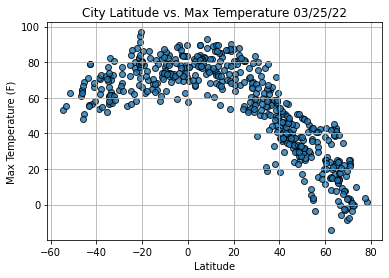

In [34]:
#build scatter plot for latitude vs max temp 
import matplotlib.pyplot as plt
plt.scatter(lats, max_temps,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

plt.show()

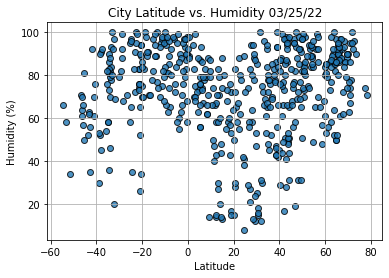

In [35]:
#build scatter plot for latitude vs humidity 
plt.scatter(lats, humidity,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

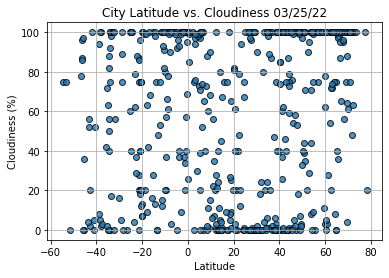

In [36]:
#build a scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

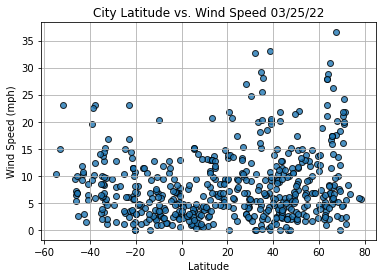

In [37]:
#build a scatter plot for latitude vs cloudiness
plt.scatter(lats, wind_speed,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()

In [63]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.show()

In [64]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2022-03-26 03:11:56
Lat                         -21.2
Lng                        -175.2
Max Temp                    82.56
Humidity                       74
Cloudiness                     20
Wind Speed                   11.5
Name: 13, dtype: object

In [65]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
517     True
518    False
519    False
520     True
521     True
Name: Lat, Length: 522, dtype: bool

In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

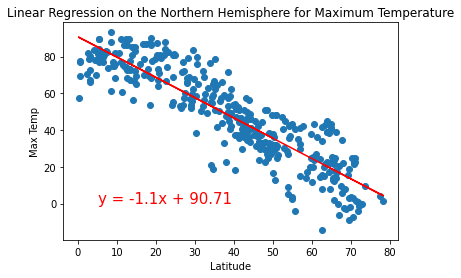

In [67]:
#linear regression on the Northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (5,0))


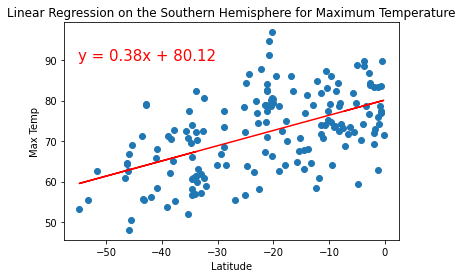

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,90))

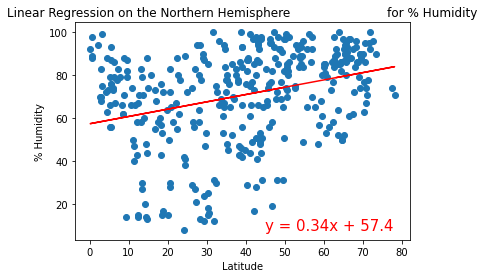

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,8))

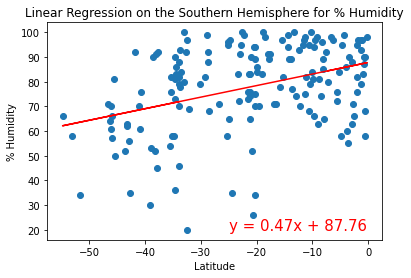

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-25,20))

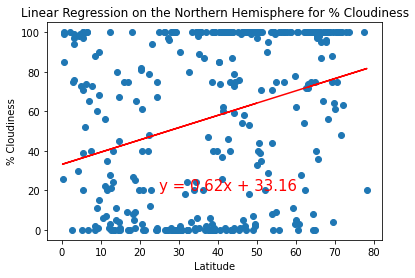

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(25,20))

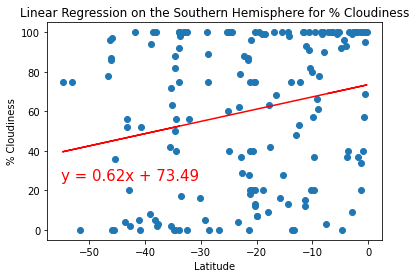

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,25))

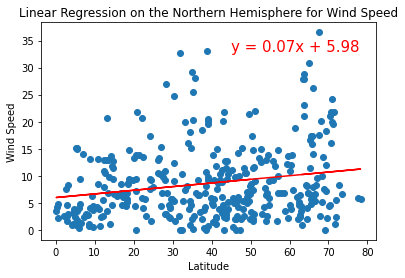

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(45,33))

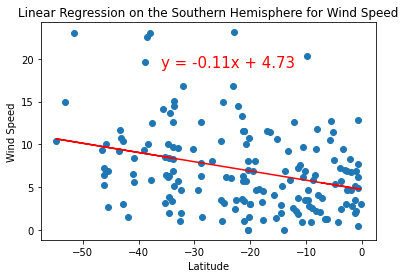

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-36,19))